# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 124kB/s 
     |████████████████████████████████| 3.8MB 44.2MB/s 
     |████████████████████████████████| 450kB 34.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=9b5f6754f7dc1db3582297cede58a8f604731a54b9b5bafb638931247aac3254
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
#Set your project path 
project_path =  '/content/drive/My Drive/NLP_Project/Sarcasm Detection/Data/'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
data_path = project_path+'Sarcasm_Headlines_Dataset.json'

In [6]:
data = pd.read_json(data_path, lines = True)

In [7]:
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [8]:
print ('Total number of Rows',data.shape[0])
print ('Total number of Coloumns',data.shape[1])

Total number of Rows 26709
Total number of Coloumns 3


In [9]:
print ('Percentage distribution of is_sarcastic 1- yes 0-no \n',data.is_sarcastic.value_counts()/data.shape[0])

Percentage distribution of is_sarcastic 1- yes 0-no 
 0    0.561047
1    0.438953
Name: is_sarcastic, dtype: float64


- From the above block we can see that Percentage distribution of is_sarcastic is imbalence but in acceptable range 

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [10]:
data.drop('article_link',inplace=True,axis=1) # dropong the article link 

In [11]:
data.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [12]:
data['len'] = data.headline.apply(lambda x : len(x.split()))

In [13]:
data.len.max()

39

In [14]:
# code to cross check 
list_len = []
max_len_of_headline = 0
for i,j in enumerate(data.headline):
  #print(j)
  split_word = j.split()
  len_of_sen = len((split_word))
  #print(len_of_sen)
  list_len.append(len_of_sen)
  if max_len_of_headline > len_of_sen:
    max_len_of_headline = max_len_of_headline

  else:
    max_len_of_headline = len_of_sen
print(max_len_of_headline)


39


(array([2.1410e+03, 1.0229e+04, 1.1190e+04, 2.5140e+03, 5.7200e+02,
        5.2000e+01, 4.0000e+00, 5.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ 2. ,  5.7,  9.4, 13.1, 16.8, 20.5, 24.2, 27.9, 31.6, 35.3, 39. ]),
 <a list of 10 Patch objects>)

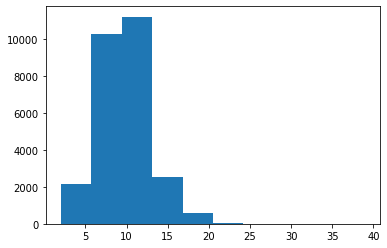

In [15]:
max_len_of_headline
max(list_len)
plt.hist(list_len)

#**## Modelling**

## Import required modules required for modelling.

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [17]:
max_features = 10000
maxlen = 20
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [18]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(data.headline)) #list(df['headline'])

# Define X and y for your model.

In [19]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0  307  678 3336 2297
   47  381 2575    5 2576 8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [20]:
num_words = len(tokenizer.word_index)+1
print ('the Vocabulary size is = ',num_words)

the Vocabulary size is =  29657


#**## Word Embedding**

## Get Glove Word Embeddings

In [21]:
glove_file = project_path + "glove.6B.zip"

In [22]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [23]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [24]:
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [25]:
model = Sequential()
### Embedding layer 
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
          # INPUT = num_words
          #OUTPUT = embedding_size 
          # INITIALIZER = Weights matrix 

### Bidirectional LSTM layer for hint 
model.add(Bidirectional(LSTM(128, return_sequences = True)))

# Adding dense layer 
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(20, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [27]:
batch_size = 100
epochs = 5
history = model.fit(X, y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 67s 3ms/sample - loss: 0.5128 - accuracy: 0.7394 - val_loss: 0.3472 - val_accuracy: 0.8491
Epoch 2/5
21367/21367 [==============================] - 62s 3ms/sample - loss: 0.2979 - accuracy: 0.8880 - val_loss: 0.3350 - val_accuracy: 0.8632
Epoch 3/5
21367/21367 [==============================] - 62s 3ms/sample - loss: 0.2001 - accuracy: 0.9295 - val_loss: 0.4032 - val_accuracy: 0.8627
Epoch 4/5
21367/21367 [==============================] - 62s 3ms/sample - loss: 0.1316 - accuracy: 0.9546 - val_loss: 0.6014 - val_accuracy: 0.8591
Epoch 5/5
21367/21367 [==============================] - 62s 3ms/sample - loss: 0.0926 - accuracy: 0.9691 - val_loss: 0.5953 - val_accuracy: 0.8566
